# Ham or Spam

In [1]:
# !pip install wordcloud

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
# df=df[['v1',v2]]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=['Class','Text']

In [8]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

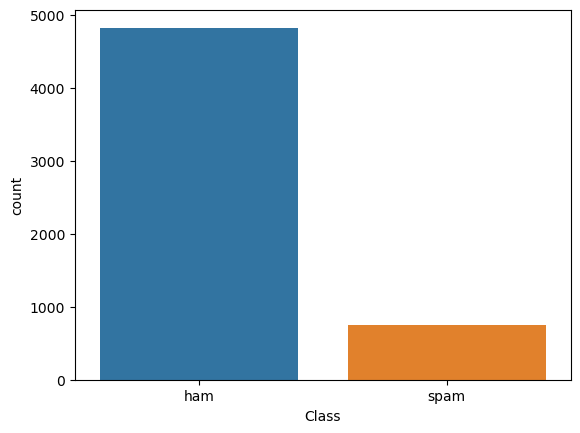

In [10]:
sns.countplot(x=df['Class'])

In [11]:
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [12]:
d={'ham':0,'spam':1}

In [13]:
df['Class']=df['Class'].map(d)

In [14]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['Text']=df['Text'].str.lower() # lowercase
df['Text']=df['Text'].str.replace('[^\w\s]','') #Remove pucnctuations
df['Text']=df['Text'].str.replace('\n','') #remove new lines
df['Text']=df['Text'].str.replace('\r','') #remove enters/ returns

C:\Users\hafsa\AppData\Local\Temp\ipykernel_9752\2971628502.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']=df['Text'].str.replace('[^\w\s]','') #Remove pucnctuations


In [41]:
df.head()

,Class,Text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('Cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    

In [55]:
ham=df[df['Class']==0]['Text']
spam=df[df['Class']==1]['Text']

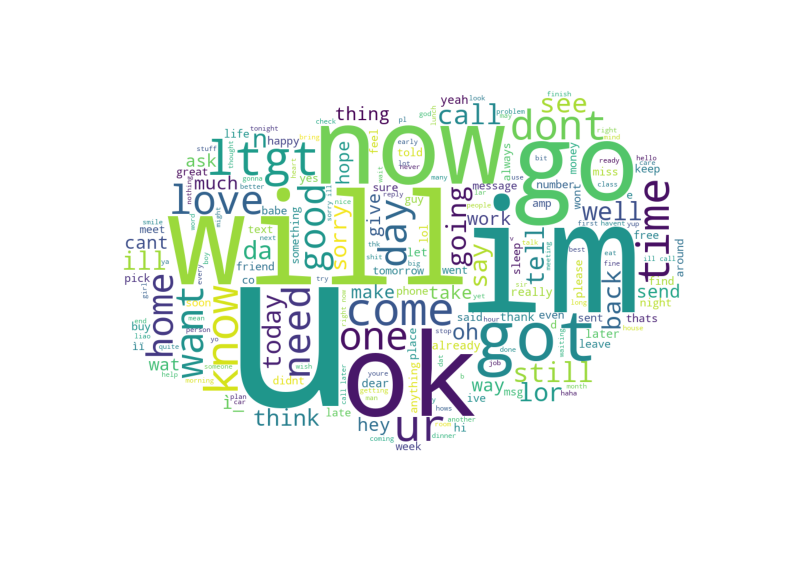

In [56]:
wc(ham,'white')

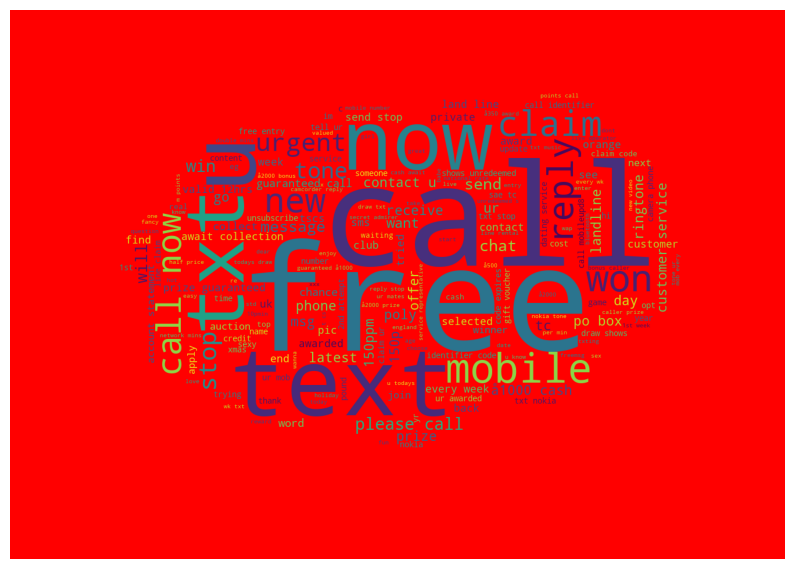

In [57]:
wc(spam,'red')

In [49]:
x=df['Text']
y=df['Class']

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [51]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [60]:
def lemma(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemma)

In [63]:
x=vect.fit_transform(x)

In [64]:
x

<5572x8188 sparse matrix of type '<class 'numpy.int64'>'
	with 77663 stored elements in Compressed Sparse Row format>

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
nb=MultinomialNB()

In [68]:
nb.fit(x_train,y_train)

MultinomialNB()

In [69]:
pred=nb.predict(x_test)

In [70]:
accuracy_score(y_test,pred)

0.9811659192825112